In [3]:
import requests
import pandas as pd

# 0️ Récupérer tous les compteurs disponibles
url_all = "https://portail-api-data.montpellier3m.fr/ecocounter/"
response_all = requests.get(url_all)

if response_all.status_code == 200:
    all_data = response_all.json()

    # Certains endpoints retournent un dict avec "data", d'autres une liste directe.
    if isinstance(all_data, dict) and "data" in all_data:
        all_counters = all_data["data"]
    else:
        all_counters = all_data

    # Extraction des IDs
    counters = [c["id"] for c in all_counters if "id" in c]
    print(f"Nombre de compteurs trouvés : {len(counters)}")

else:
    print("Erreur récupération liste des compteurs :", response_all.status_code)
    counters = []


# Dates pour l'API
from_date = "2024-11-30T00:00:00"
to_date   = "2025-12-01T23:59:59"

data = []

#  BOUCLE PRINCIPALE SUR TOUS LES COMPTEURS
for counter_id in counters:
    print(f"\n Récupération pour : {counter_id}")

    # 1️ Séries temporelles
    url_series = f"https://portail-api-data.montpellier3m.fr/ecocounter_timeseries/{counter_id}/attrs/intensity"
    params = {"fromDate": from_date, "toDate": to_date}
    response = requests.get(url_series, params=params)
    
    if response.status_code == 200:
        data_series = response.json()

        if "index" not in data_series or "values" not in data_series:
            print(f"⚠ Pas de série temporelle pour {counter_id}")
            continue

        df_series_1 = pd.DataFrame({
            "datetime": data_series["index"],
            "intensity": data_series["values"]
        })

        if df_series_1.empty:
            print(f"⚠ Série vide pour {counter_id}")
            continue

        df_series_1["counter_id"] = counter_id

    else:
        print(f"Erreur séries temporelles pour {counter_id} : {response.status_code}")
        continue


    # 2️ Description du compteur
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
    else:
        print(f"⚠ Erreur description pour {counter_id} : {response_desc.status_code}")
        lat = lon = laneId = vehicleType = None

    # Ajout des colonnes statiques
    df_series_1["lat"] = lat
    df_series_1["lon"] = lon
    df_series_1["laneId"] = laneId
    df_series_1["vehicleType"] = vehicleType

    data.append(df_series_1)
    print(f"   → {len(df_series_1)} lignes ajoutées")


# 3️ Fusion finale et export CSV
if data:
    df_brut = pd.concat(data, ignore_index=True)
    df_brut["datetime"] = pd.to_datetime(df_brut["datetime"])
    
    df_brut.to_csv("../data/raw/data_brut_1.csv", index=False)
    print("\n CSV complet enregistré : ../data/raw/data_brut_1.csv")
else:
    print(" Aucune donnée récupérée")


Nombre de compteurs trouvés : 20

 Récupération pour : urn:ngsi-ld:EcoCounter:XTH19101158
   → 8812 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H22104775
   → 8810 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H20042632
Erreur séries temporelles pour urn:ngsi-ld:EcoCounter:X2H20042632 : 404

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H20063164
   → 8568 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H19070220
   → 8783 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H22104771
   → 8810 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070350
   → 8787 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070349
   → 8809 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070348
   → 8569 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H22104766
   → 8809 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070343
   → 7717 lignes ajoutées

 Récupé

In [4]:
df_brut.groupby("counter_id")["datetime"].agg(["min", "max"])

,min,max
counter_id,,
urn:ngsi-ld:EcoCounter:X2H19070220,2024-11-30 00:00:00+00:00,2025-11-30 23:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H20042635,2024-11-30 00:00:00+00:00,2025-12-01 03:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H20063164,2024-11-30 00:00:00+00:00,2025-09-12 00:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070342,2024-11-30 00:00:00+00:00,2025-11-21 15:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070343,2025-01-14 07:00:00+00:00,2025-12-01 00:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070346,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070348,2024-11-30 00:00:00+00:00,2025-09-23 01:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070349,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070350,2024-11-30 00:00:00+00:00,2025-01-23 02:00:00+00:00


## 1️ Statistiques descriptives : (les statistiques globales et par compteur)
Moyenne, min, max, écart-type, etc. pour chaque compteur

In [5]:
# Statistiques globales
print("Statistiques globales sur l'intensité :")
print(df_brut["intensity"].describe())

# Statistiques par compteur
stats_par_counter = df_brut.groupby("counter_id")["intensity"].describe()
display(stats_par_counter)


Statistiques globales sur l'intensité :
count    156950.000000
mean         27.675043
std          49.305148
min           0.000000
25%           1.000000
50%           8.000000
75%          30.000000
max         576.000000
Name: intensity, dtype: float64


,count,mean,std,min,25%,50%,75%,max
counter_id,,,,,,,,
urn:ngsi-ld:EcoCounter:X2H19070220,8783.0,51.361722,54.996660,0.0,5.0,39.0,76.0,576.0
urn:ngsi-ld:EcoCounter:X2H20042635,8810.0,27.470375,29.858924,0.0,4.0,19.0,42.0,211.0
urn:ngsi-ld:EcoCounter:X2H20063164,8568.0,2.533497,4.252484,0.0,0.0,1.0,3.0,38.0
urn:ngsi-ld:EcoCounter:X2H21070342,8808.0,17.958220,21.101658,0.0,2.0,12.0,26.0,139.0
urn:ngsi-ld:EcoCounter:X2H21070343,7717.0,1.696514,3.430931,0.0,0.0,0.0,2.0,30.0
urn:ngsi-ld:EcoCounter:X2H21070346,8808.0,9.207993,10.751436,0.0,0.0,5.0,16.0,73.0
urn:ngsi-ld:EcoCounter:X2H21070348,8569.0,22.589567,30.411517,0.0,2.0,12.0,29.0,201.0
urn:ngsi-ld:EcoCounter:X2H21070349,8809.0,64.490180,68.806647,0.0,12.0,42.0,96.0,407.0
urn:ngsi-ld:EcoCounter:X2H21070350,8787.0,2.461022,4.674974,0.0,0.0,1.0,3.0,50.0


## 2️ Calcul de la durée de collecte pour chaque compteur : 
**calculer le nombre de jours pour chaque compteur et créer des groupes selon tes critères :**

In [6]:
# Convertir datetime si ce n'est pas déjà fait
df_brut["datetime"] = pd.to_datetime(df_brut["datetime"])

# Calcul de la durée en jours pour chaque compteur
duration = df_brut.groupby("counter_id")["datetime"].agg(["min", "max"])
duration["days"] = (duration["max"] - duration["min"]).dt.days + 1

# Ajouter une colonne catégorie
def categorize_counter(days):
    if days >= 365:
        return "plus de 365 jours"
    elif days >= 200:
        return "200 jours ou plus"
    elif days < 100:
        return "moins de 100 jours"
    else:
        return "autres"

duration["category"] = duration["days"].apply(categorize_counter)
display(duration)

,min,max,days,category
counter_id,,,,
urn:ngsi-ld:EcoCounter:X2H19070220,2024-11-30 00:00:00+00:00,2025-11-30 23:00:00+00:00,366,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H20042635,2024-11-30 00:00:00+00:00,2025-12-01 03:00:00+00:00,367,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H20063164,2024-11-30 00:00:00+00:00,2025-09-12 00:00:00+00:00,287,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070342,2024-11-30 00:00:00+00:00,2025-11-21 15:00:00+00:00,357,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070343,2025-01-14 07:00:00+00:00,2025-12-01 00:00:00+00:00,321,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070346,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00,367,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H21070348,2024-11-30 00:00:00+00:00,2025-09-23 01:00:00+00:00,298,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070349,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00,367,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H21070350,2024-11-30 00:00:00+00:00,2025-01-23 02:00:00+00:00,55,moins de 100 jours


## 4️ Visualisation
#### a) Séries temporelles pour chaque compteur

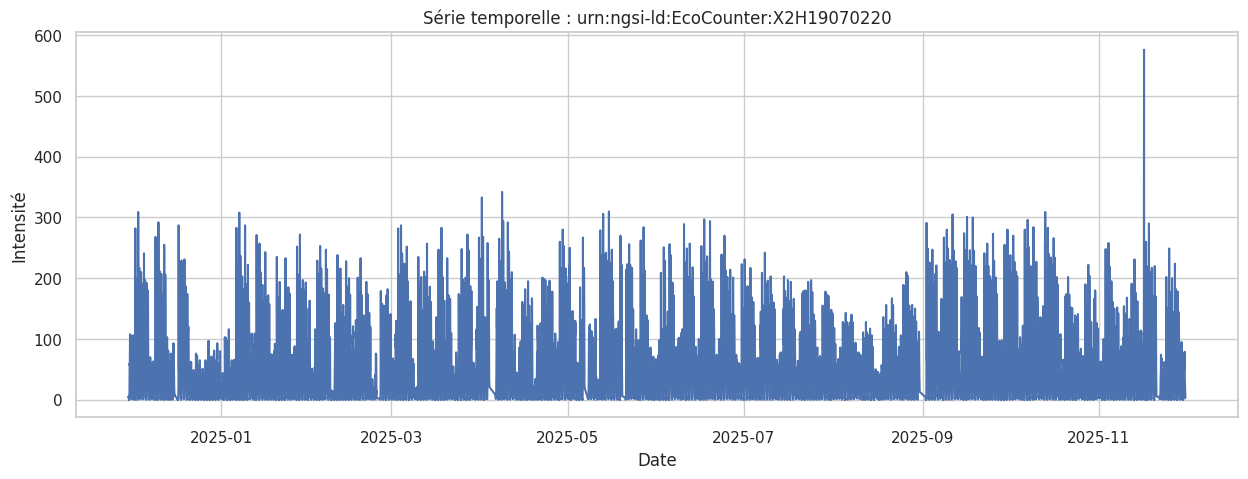

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Exemple pour un compteur
compteur = "urn:ngsi-ld:EcoCounter:X2H19070220"
df_plot = df_brut[df_brut["counter_id"] == compteur]

plt.figure(figsize=(15,5))
plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)
plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title(f"Série temporelle : {compteur}")
plt.show()

#### b) Comparer jours de semaine vs week-end

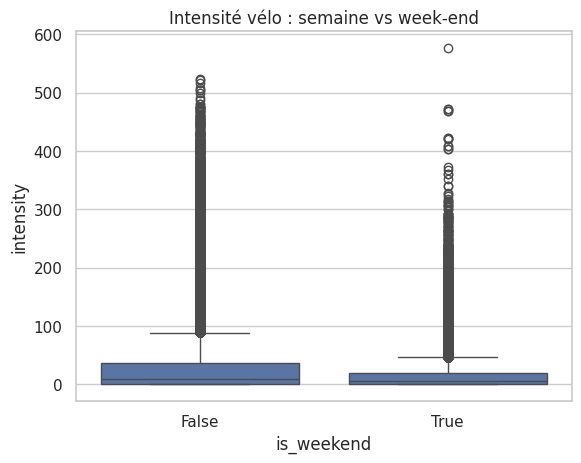

In [8]:
df_brut["weekday"] = df_brut ["datetime"].dt.weekday  # 0 = lundi ... 6 = dimanche
df_brut["is_weekend"] = df_brut["weekday"].isin([5,6])

sns.boxplot(x="is_weekend", y="intensity", data=df_brut)
plt.title("Intensité vélo : semaine vs week-end")
plt.show()

#### c) Heures de pointe

In [9]:
#c.1 Création la colonne 'hour' à partir de 'datetime'
df_brut['hour'] = pd.to_datetime(df_brut['datetime']).dt.hour

# Vérifier
print(df_brut[['datetime','hour']].head())

                   datetime  hour
0 2024-11-30 00:00:00+00:00     0
1 2024-11-30 01:00:00+00:00     1
2 2024-11-30 02:00:00+00:00     2
3 2024-11-30 03:00:00+00:00     3
4 2024-11-30 04:00:00+00:00     4


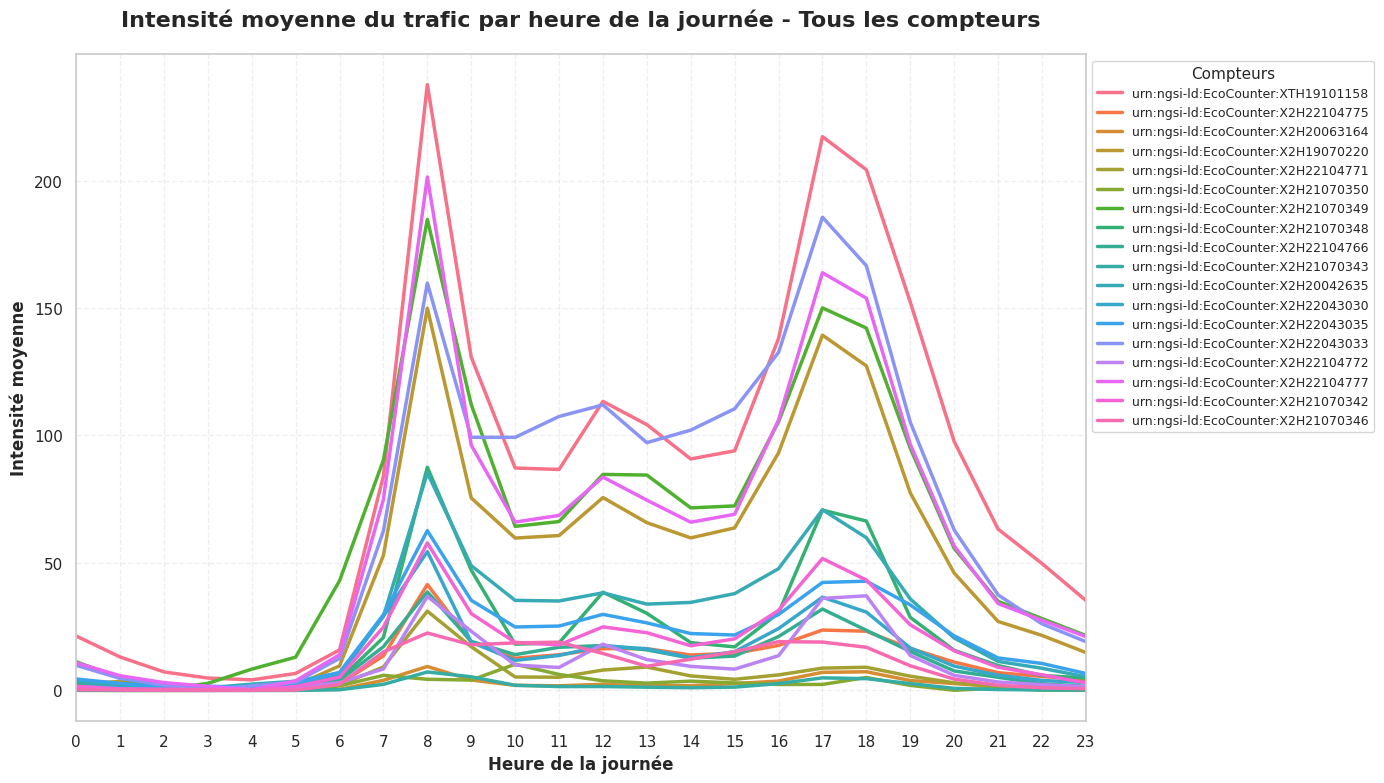

In [10]:
#C.1 # Configuration p
plt.figure(figsize=(14, 8))

# Création du graphique avec tous les compteurs
sns.lineplot(x="hour", y="intensity", hue="counter_id", data=df_brut, 
        estimator="mean", errorbar=None, linewidth=2.5)

# titres et labels
plt.title("Intensité moyenne du trafic par heure de la journée - Tous les compteurs", 
        fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Heure de la journée", fontsize=12, fontweight='bold')
plt.ylabel("Intensité moyenne", fontsize=12, fontweight='bold')

# axes
plt.xticks(range(0, 24, 1))  # Toutes les heures
plt.xlim(0, 23)
plt.grid(True, alpha=0.3, linestyle='--')

# la légende pour tous les compteurs
plt.legend(title="Compteurs", title_fontsize=11, fontsize=9, 
        loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement du layout
plt.tight_layout()

plt.show()

### OBSERVATIONS PRINCIPALES DU GRAPHIQUE:
**Profil de trafic observé**
Nuit (0h – 6h) :
Le trafic est très faible, proche de zéro entre minuit et 5h. Cela correspond aux heures de faible activité générale.

Pic matinal (6h – 9h) :
Une forte croissance du trafic commence vers 6h, avec un pic matinal entre 8h et 9h (proche de 200 véhicules/heure en moyenne).
Ce pic correspond typiquement aux déplacements domicile–travail/école.

Pause de la mi-journée (10h – 15h) :
Après le pic matinal, le trafic diminue légèrement mais reste soutenu, avec une légère baisse vers 12h–13h peut-être liée à la pause déjeuner.

Pic vespéral (16h – 19h) :
Une seconde montée du trafic est visible dès 16h, avec un pic vespéral entre 17h et 18h (aussi proche de 200 véhicules/heure).
Cela correspond aux retours du travail et aux déplacements de fin d’après-midi.

Soirée (20h – 23h) :
Le trafic décroît progressivement après 19h, pour revenir à un niveau bas après 21h–22h.

**3. Interprétation des données**
Profil bidomodal classique :

La courbe montre deux pics principaux (matin et soir), ce qui est caractéristique du trafic routier en zone urbaine ou périurbaine, lié aux activités économiques et scolaires.

Absence de pic de midi marqué :

Contrairement à certaines zones commerciales, il n’y a pas de troisième pic à l’heure du déjeuner, ce qui peut indiquer que les compteurs sont surtout placés sur des axes domicile–travail plutôt que commerciaux.

Plateau entre 9h et 16h :

Le trafic reste stable à un niveau moyen (environ 100–150 véhicules/heure), reflétant une activité continue (livraisons, déplacements professionnels, etc.).

**4. Implications possibles**

Gestion du trafic :
Les pics de 8h–9h et 17h–18h peuvent justifier des mesures de régulation (feux synchronisés, voies réservées) pour éviter la congestion.

Planification urbaine :
Ce profil suggère que les infrastructures concernées sont surtout utilisées pour des déplacements pendulaires. Une diversification des horaires de travail ou du télétravail pourrait lisser ces pics.

Maintenance des équipements :
Les plages de très faible trafic (nuit) pourraient être utilisées pour des travaux d’entretien avec un impact minimal sur les usagers.

**5. Limites de l’analyse**
Les données sont une moyenne de tous les compteurs, ce qui peut masquer des variations locales (un axe peut avoir un profil différent).

Pas d’indication sur le type de véhicules .

Pas de précision sur les jours de la semaine (le profil pourrait être très différent le week-end).

**Conclusion**
Le graphique confirme un profil de trafic pendulaire typique avec deux pics principaux aux heures de pointe du matin et du soir.
La modélisation du trafic sur ces axes pourrait aider à optimiser la signalisation, réduire les embouteillages et planifier l’entretien des routes.

## Traitement des données

In [11]:
# Nombre de NaN par colonne
print(df_brut.isna().sum())

# Pourcentage de NaN
print(df_brut.isna().mean() * 100)

datetime       0
intensity      0
counter_id     0
lat            0
lon            0
laneId         0
vehicleType    0
weekday        0
is_weekend     0
hour           0
dtype: int64
datetime       0.0
intensity      0.0
counter_id     0.0
lat            0.0
lon            0.0
laneId         0.0
vehicleType    0.0
weekday        0.0
is_weekend     0.0
hour           0.0
dtype: float64


In [12]:
# Nombre total de doublons exacts sur toutes les colonnes
print("Nombre de doublons exacts :", df_brut.duplicated().sum())

Nombre de doublons exacts : 23257


#### verification des données doublons

In [13]:
# Afficher toutes les lignes qui sont des doublons
doublons = df_brut[df_brut.duplicated(keep=False)]  # keep=False montre toutes les occurrences
display(doublons)

,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
1253,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1254,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1255,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1256,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
1257,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
...,...,...,...,...,...,...,...,...,...,...
154762,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154763,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154764,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1
154765,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1


In [14]:
# Vérifier les doublons sur colonnes spécifiques
doublons_subset = df_brut[df_brut.duplicated(subset=['datetime', 'counter_id'], keep=False)]
display(doublons_subset)

,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
1253,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1254,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1255,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1256,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
1257,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
...,...,...,...,...,...,...,...,...,...,...
154762,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154763,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154764,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1
154765,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1


In [15]:
# doublons sont exactement identiques alors supprimer
df_brut = df_brut.drop_duplicates()

### chercher les valeurs abberantes: 

In [16]:
# Intensité négative ou trop élevée (>300) .
intensity_neg = df_brut[df_brut['intensity'] < 0]
print("Valeurs négatives :")

Valeurs négatives :


In [17]:
intensity_high = df_brut[df_brut['intensity'] > 300]
print("Valeurs très élevées (>300) :")
display(intensity_high)

Valeurs très élevées (>300) :


,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
56,2024-12-02 08:00:00+00:00,398.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,0,False,8
66,2024-12-02 18:00:00+00:00,329.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,0,False,18
80,2024-12-03 08:00:00+00:00,470.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,1,False,8
89,2024-12-03 17:00:00+00:00,353.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,1,False,17
90,2024-12-03 18:00:00+00:00,328.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,1,False,18
...,...,...,...,...,...,...,...,...,...,...
138220,2025-10-15 17:00:00+00:00,303.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,2,False,17
138235,2025-10-16 08:00:00+00:00,415.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,3,False,8
138244,2025-10-16 17:00:00+00:00,307.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,3,False,17
138245,2025-10-16 18:00:00+00:00,307.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,3,False,18


In [18]:
print(intensity_high.groupby('counter_id')['intensity'].count())

counter_id
urn:ngsi-ld:EcoCounter:X2H19070220     10
urn:ngsi-ld:EcoCounter:X2H21070349     91
urn:ngsi-ld:EcoCounter:X2H22043033    109
urn:ngsi-ld:EcoCounter:X2H22104777    161
urn:ngsi-ld:EcoCounter:XTH19101158    330
Name: intensity, dtype: int64


In [ ]:
# remplacer par la médiane par compteur: 
# df_brut['intensity'] = df_brut.groupby('counter_id')['intensity'].transform(
#     lambda x: x.clip(lower=0, upper=300)
# )

# Cree une Dataset principal (>=365 jours)

In [19]:
#  1️ Filtrer les compteurs fiables (durée >= 162 jours)
reliable_counters = duration[duration["days"] >= 162].index.tolist()
df_365 = df_brut[df_brut ["counter_id"].isin(reliable_counters)].copy()

#  2️ Ajouter les colonnes temporelles
df_365["hour"] = df_365["datetime"].dt.hour # c'est 
df_365["weekday"] = df_365["datetime"].dt.weekday  # 0 = lundi
df_365["is_weekend"] = df_365["weekday"].isin([5,6]).astype(int)

#  3️ Créer df_description ( car on n'est pas fait au debut )
all_desc = []

for counter_id in reliable_counters:
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
        
        all_desc.append({
            "counter_id": counter_id,
            "lat": lat,
            "lon": lon,
            "laneId": laneId,
            "vehicleType": vehicleType
        })
    else:
        all_desc.append({
            "counter_id": counter_id,
            "lat": None,
            "lon": None,
            "laneId": None,
            "vehicleType": None
        })

df_description = pd.DataFrame(all_desc)

#  4️ Merge pour ajouter les colonnes statiques au df_162
df_365 = df_365.merge(df_description, on="counter_id", how="left")

#  5️ des features pour prédiction
# Moyenne glissante sur 3 heures
df_365["rolling_3h"] = df_365.groupby("counter_id")["intensity"].transform(lambda x: x.rolling(3, min_periods=1).mean())
# Décalages temporels
df_365["lag_1h"] = df_365.groupby("counter_id")["intensity"].shift(1)
df_365["lag_24h"] = df_365.groupby("counter_id")["intensity"].shift(24)

#  Vérification rapide
display(df_365.head())
print("Nombre de lignes :", len(df_365))
print("Liste des compteurs dans df_365 :", df_365["counter_id"].unique())


,datetime,intensity,counter_id,lat_x,lon_x,laneId_x,vehicleType_x,weekday,is_weekend,hour,lat_y,lon_y,laneId_y,vehicleType_y,rolling_3h,lag_1h,lag_24h
0,2024-11-30 00:00:00+00:00,44.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,5,1,0,43.61621,3.874408,188609530,bicycle,44.000000,NaN,NaN
1,2024-11-30 01:00:00+00:00,16.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,5,1,1,43.61621,3.874408,188609530,bicycle,30.000000,44.0,NaN
2,2024-11-30 02:00:00+00:00,5.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,5,1,2,43.61621,3.874408,188609530,bicycle,21.666667,16.0,NaN
3,2024-11-30 03:00:00+00:00,3.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,5,1,3,43.61621,3.874408,188609530,bicycle,8.000000,5.0,NaN
4,2024-11-30 04:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,5,1,4,43.61621,3.874408,188609530,bicycle,4.000000,3.0,NaN


Nombre de lignes : 132562
Liste des compteurs dans df_365 : ['urn:ngsi-ld:EcoCounter:XTH19101158' 'urn:ngsi-ld:EcoCounter:X2H22104775'
 'urn:ngsi-ld:EcoCounter:X2H20063164' 'urn:ngsi-ld:EcoCounter:X2H19070220'
 'urn:ngsi-ld:EcoCounter:X2H22104771' 'urn:ngsi-ld:EcoCounter:X2H21070349'
 'urn:ngsi-ld:EcoCounter:X2H21070348' 'urn:ngsi-ld:EcoCounter:X2H22104766'
 'urn:ngsi-ld:EcoCounter:X2H21070343' 'urn:ngsi-ld:EcoCounter:X2H20042635'
 'urn:ngsi-ld:EcoCounter:X2H22043030' 'urn:ngsi-ld:EcoCounter:X2H22043035'
 'urn:ngsi-ld:EcoCounter:X2H22043033' 'urn:ngsi-ld:EcoCounter:X2H22104772'
 'urn:ngsi-ld:EcoCounter:X2H22104777' 'urn:ngsi-ld:EcoCounter:X2H21070342'
 'urn:ngsi-ld:EcoCounter:X2H21070346']


In [21]:
# 
df_365 = df_365.rename(columns={
    "lat_y": "lat",
    "lon_y": "lon",
    "laneId_y": "laneId",
    "vehicleType_y": "vehicleType"
})

In [22]:
df_365 = df_365.drop(columns=[
    "lat_x", 
    "lon_x", 
    "laneId_x", 
    "vehicleType_x"
])

In [23]:
print(df_365.columns)

Index(['datetime', 'intensity', 'counter_id', 'weekday', 'is_weekend', 'hour',
       'lat', 'lon', 'laneId', 'vehicleType', 'rolling_3h', 'lag_1h',
       'lag_24h'],
      dtype='object')


In [24]:
df_365.to_csv("../data/processed/df_365_clean.csv", index=False)

### Visualisation des compteurs retenus ( les plus fort )

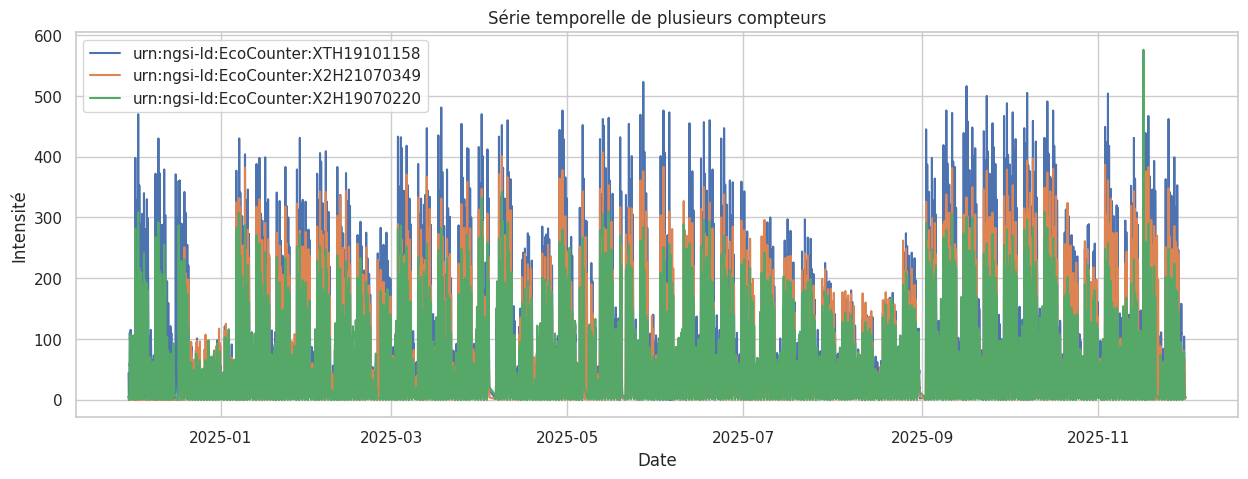

In [28]:
import matplotlib.pyplot as plt

compteurs = [
    "urn:ngsi-ld:EcoCounter:XTH19101158",
    "urn:ngsi-ld:EcoCounter:X2H21070349",
    "urn:ngsi-ld:EcoCounter:X2H19070220"
]

plt.figure(figsize=(15,5))

for compteur in compteurs:
    df_plot = df_brut[df_brut["counter_id"] == compteur]
    plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)

plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title("Série temporelle de plusieurs compteurs")
plt.legend()
plt.show()

In [33]:
# 1️ Récupérer les listes de compteurs par catégorie
counters_365 = duration[duration["category"] == "plus de 365 jours"].index.tolist()
counters_200 = duration[duration["category"] == "200 jours ou plus"].index.tolist()
counters_100 = duration[duration["category"] == "moins de 100 jours"].index.tolist()

In [34]:
print(">= 365 jours :", len(counters_365))
print(">= 200jours :", len(counters_200))
print("< 100 jours :", len(counters_100))

>= 365 jours : 12
>= 200jours : 5
< 100 jours : 1


### Creation des datsets supplementaires 

In [35]:
df_200 = df_brut[df_brut["counter_id"].isin(counters_200)].copy()
df_100 = df_brut[df_brut["counter_id"].isin(counters_100)].copy()

In [37]:
print("df_brut :", df_brut.shape)
print("df_365 :", df_365.shape)
print("df_200 :", df_200.shape)
print("df_100 :", df_100.shape)

print("\nCompteurs dans df_365 :")
print(df_365["counter_id"].nunique())

print("\nCompteurs dans df_200 :")
print(df_200["counter_id"].nunique())

print("\nCompteurs dans df_100 :")
print(df_100["counter_id"].nunique())

df_brut : (133693, 10)
df_365 : (132562, 13)
df_200 : (30136, 10)
df_100 : (1131, 10)

Compteurs dans df_365 :
17

Compteurs dans df_200 :
5

Compteurs dans df_100 :
1


## 1) Corrélation interne (api velo seule)

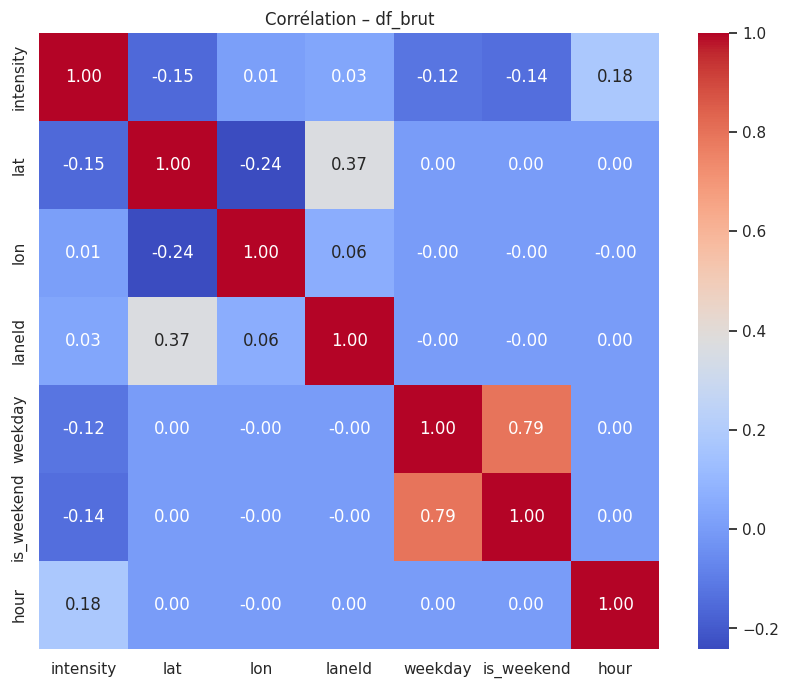

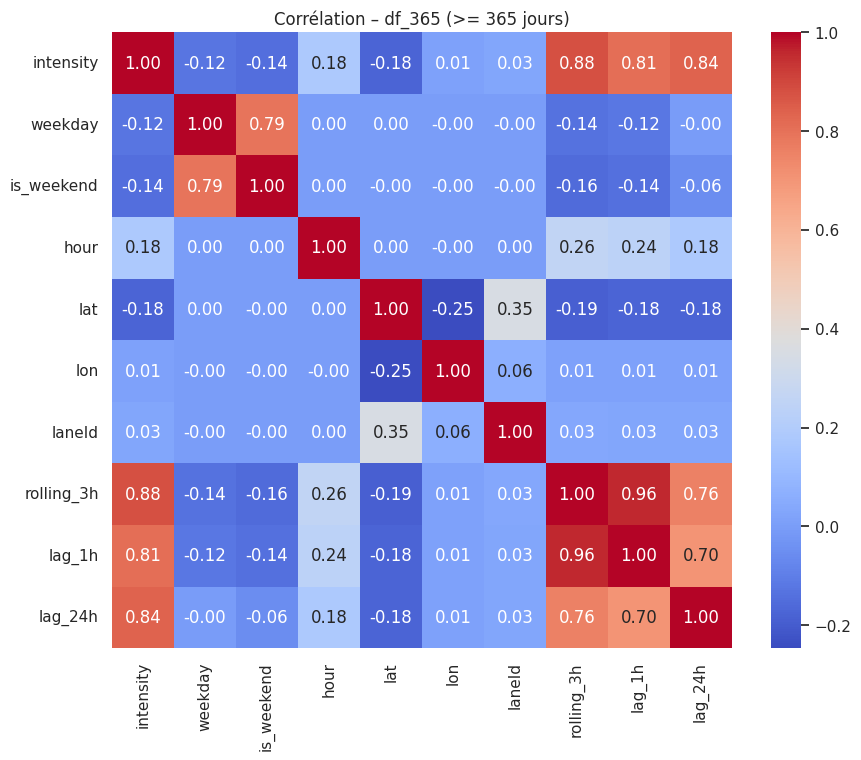

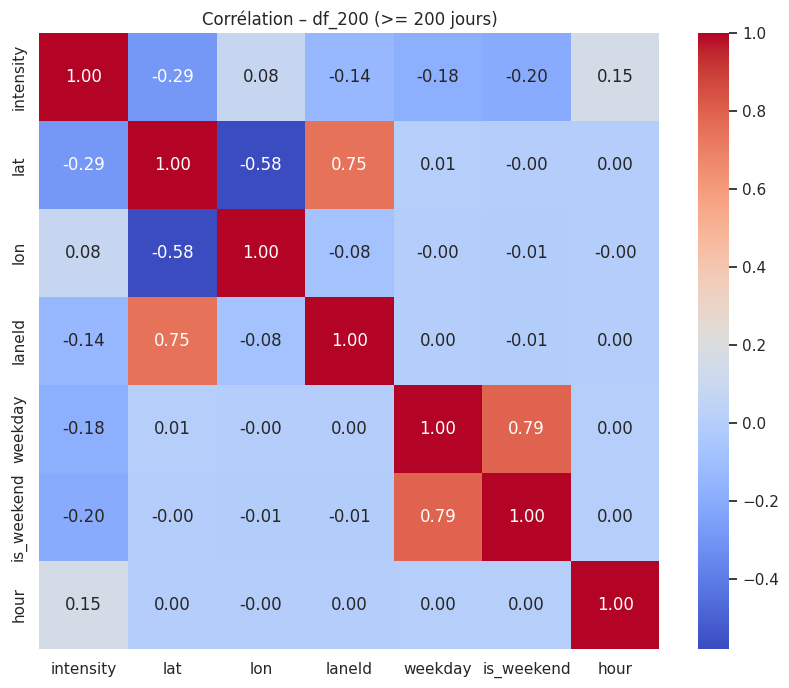

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df, title):
    plt.figure(figsize=(10, 8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Corrélations
plot_correlation(df_brut, "Corrélation – df_brut")
plot_correlation(df_365, "Corrélation – df_365 (>= 365 jours)")
plot_correlation(df_200, "Corrélation – df_200 (>= 200 jours)")


## 2) Corrélation avec la météo (ma_meteo_export.csv)

 Objectif :
Voir si l’intensité vélo dépend :

de la température

de la pluie

du vent

de l'humidité

In [41]:
#2.1 Charger la météo: 
df_meteo = pd.read_csv(
    "../data/raw/ma_meteo_export.csv",
    sep=";",                # séparateur ; 
    decimal=",",  # virgule : float
    )   
## Convertir datetime        
df_meteo["datetime"] = pd.to_datetime(df_meteo["datetime"])
# Vérification
print(df_meteo.dtypes)
display(df_meteo.head())

datetime          datetime64[ns]
temperature_2m           float64
wind_speed_10m           float64
precipitation            float64
dtype: object


,datetime,temperature_2m,wind_speed_10m,precipitation
0,2025-03-10 00:00:00,10.1,8.8,0.1
1,2025-03-10 01:00:00,9.9,6.9,0.0
2,2025-03-10 02:00:00,10.2,9.6,0.0
3,2025-03-10 03:00:00,10.3,10.0,0.0
4,2025-03-10 04:00:00,10.0,10.3,0.0


In [42]:
# 2.2 Fusionner la météo avec les datasets vélo:   merge par datetime :
def merge_meteo(df_velo, df_meteo):
    df = df_velo.merge(df_meteo, on="datetime", how="left")
    return df

df_brut["datetime"] = df_brut["datetime"].dt.tz_convert(None)
df_365["datetime"] = df_365["datetime"].dt.tz_convert(None)
df_200["datetime"] = df_200["datetime"].dt.tz_convert(None)
df_100["datetime"] = df_100["datetime"].dt.tz_convert(None)

In [43]:
# verification: 
print(df_brut["datetime"].dtype)
print(df_meteo["datetime"].dtype)

datetime64[ns]
datetime64[ns]


In [44]:
# uniformiser dans l’autre sens (mettre UTC aussi dans météo)
df_meteo["datetime"] = df_meteo["datetime"].dt.tz_localize("UTC")

In [45]:
print("df_all :", df_brut["datetime"].dtype)
print("df_meteo :", df_meteo["datetime"].dtype)

print(df_brut["datetime"].head())
print(df_meteo["datetime"].head())

df_all : datetime64[ns]
df_meteo : datetime64[ns, UTC]
0   2024-11-30 00:00:00
1   2024-11-30 01:00:00
2   2024-11-30 02:00:00
3   2024-11-30 03:00:00
4   2024-11-30 04:00:00
Name: datetime, dtype: datetime64[ns]
0   2025-03-10 00:00:00+00:00
1   2025-03-10 01:00:00+00:00
2   2025-03-10 02:00:00+00:00
3   2025-03-10 03:00:00+00:00
4   2025-03-10 04:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]


In [46]:
df_meteo["datetime"] = df_meteo["datetime"].dt.tz_localize(None)

In [48]:
df_brut_meteo = df_brut.merge(df_meteo, on="datetime", how="left")
df_365_meteo = df_365.merge(df_meteo, on="datetime", how="left")
df_200_meteo = df_200.merge(df_meteo, on="datetime", how="left")
df_100_meteo = df_100.merge(df_meteo, on="datetime", how="left")

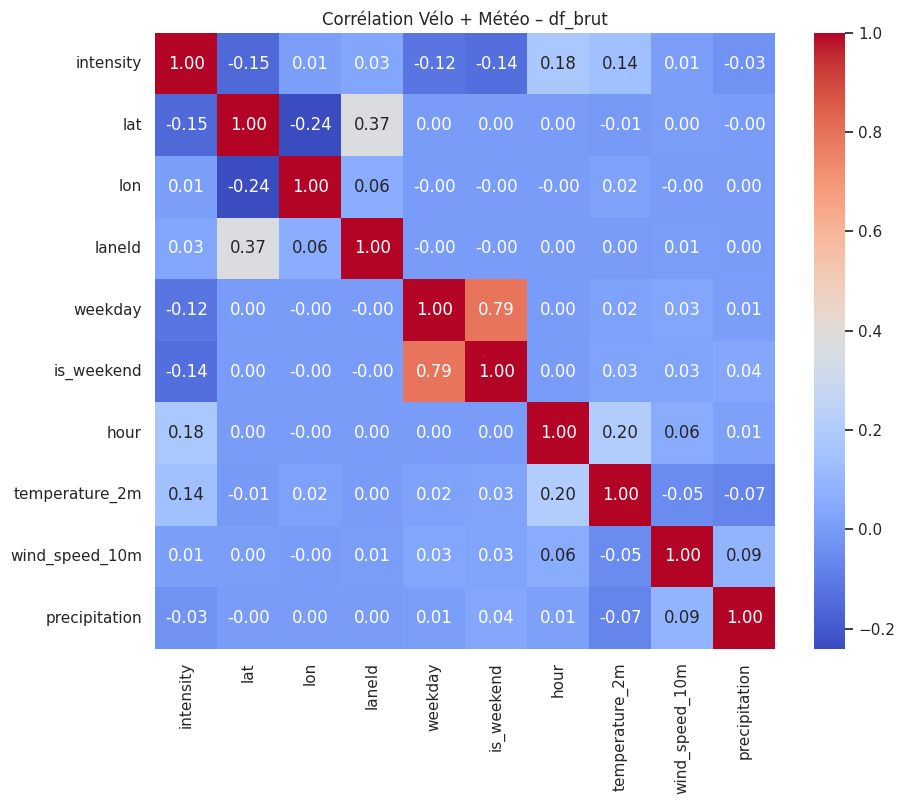

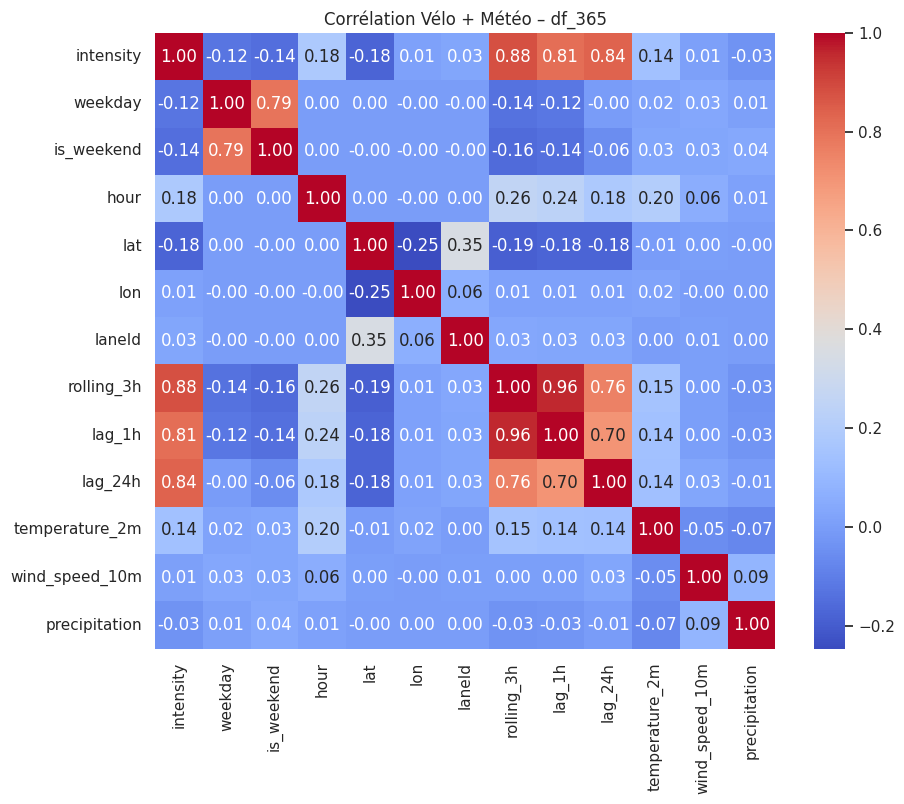

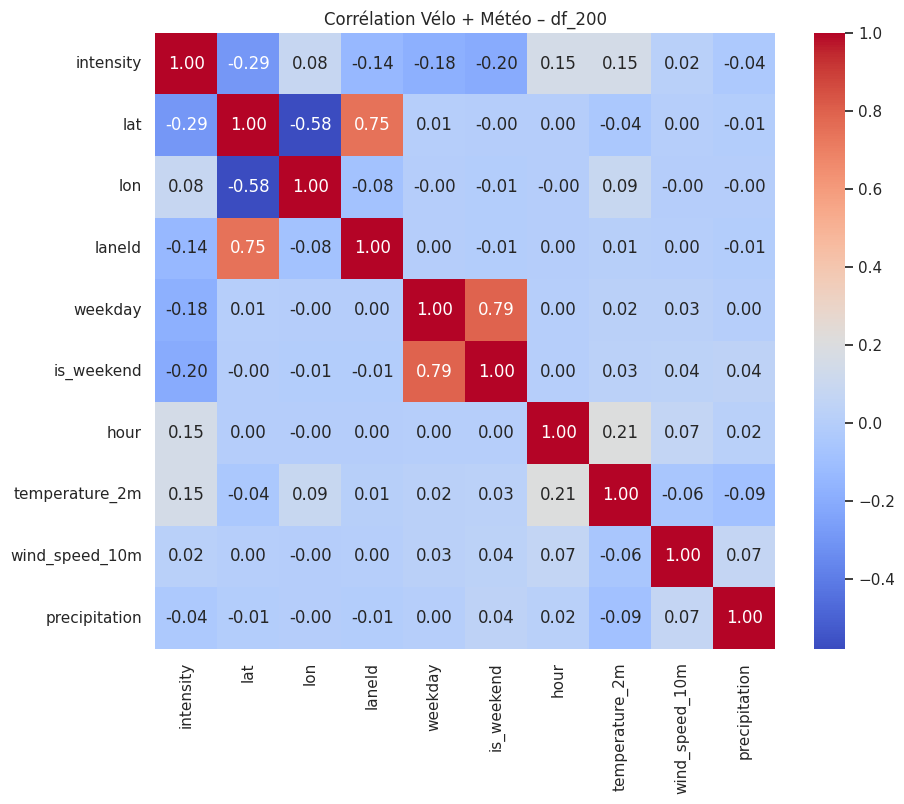

In [54]:
# 2.3 Corrélation météo ↔ intensité
plot_correlation(df_brut_meteo, "Corrélation Vélo + Météo – df_brut")
plot_correlation(df_365_meteo, "Corrélation Vélo + Météo – df_365")
plot_correlation(df_200_meteo, "Corrélation Vélo + Météo – df_200")

### analyse : Les corrélations sont faibles mais cohérentes avec l'intuition :

Température ↑ → Vélo ↑ (léger effet positif)

Pluie ↑ → Vélo ↓ (léger effet négatif)

Vent → pas d'effet clair

Les corrélations :

**Pluie a un effet négatif (-0.03) sur le vélo** 

**Température a un effet positif (+0.13 à +0.14)**

**Mais ces effets sont faibles en corrélation linéaire. Pour mieux les voir :

Essayer des visualisations non linéaires (boxplot par catégorie)

Tester des décalages temporels (pluie à l'heure t-1 vs vélo à l'heure t)

Utiliser des seuils pour voir les effets forts (jours de forte pluie)

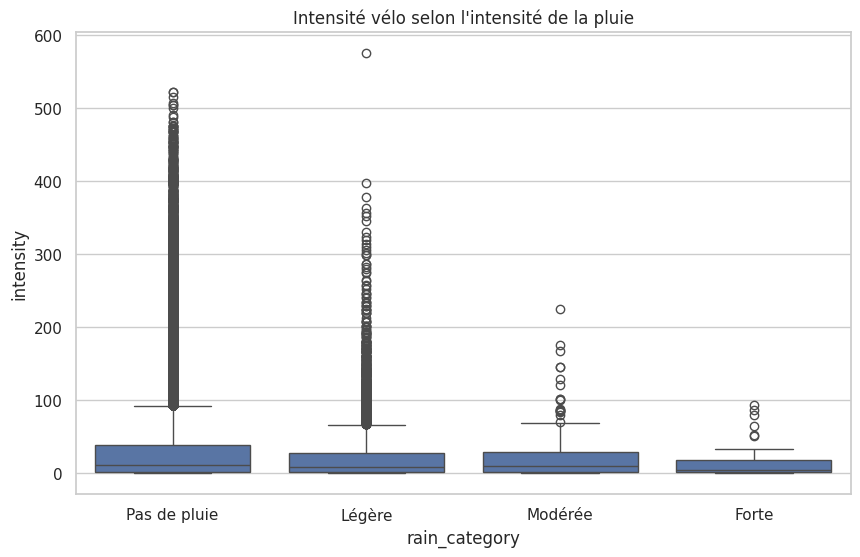

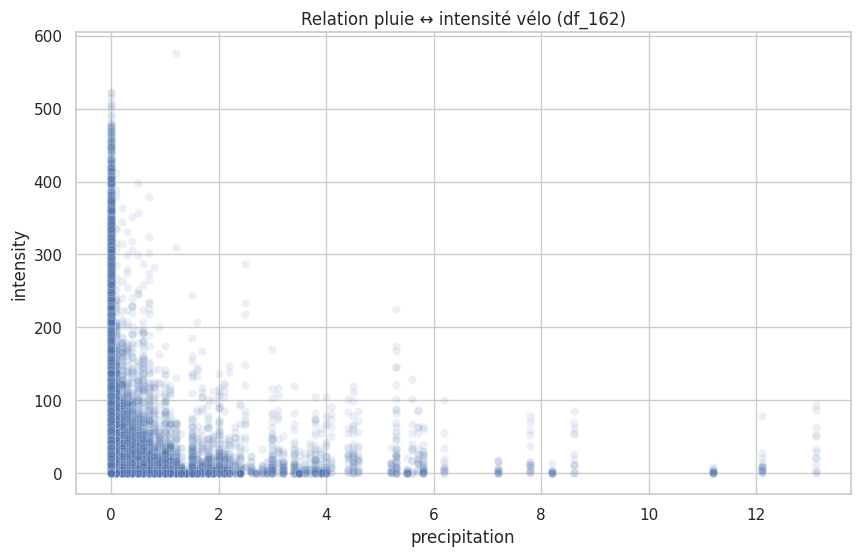

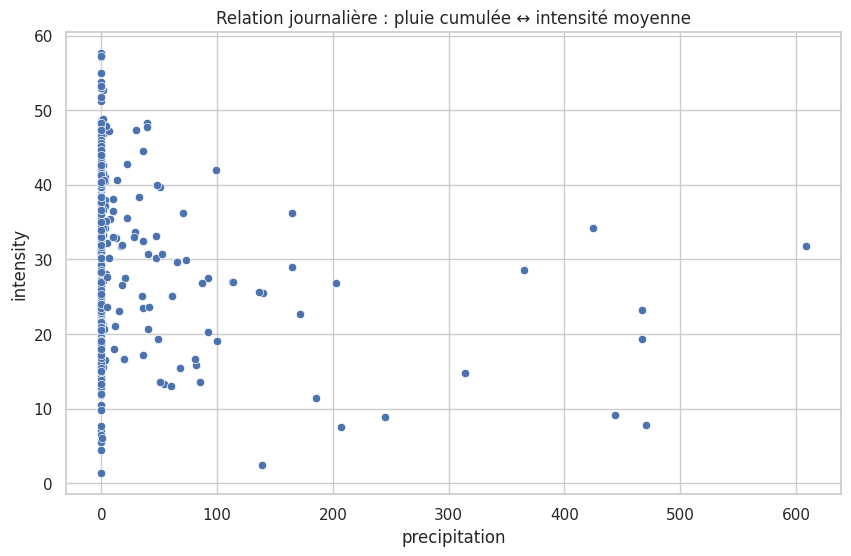

In [51]:
# 1. Créer des catégories de pluie
df_365_meteo['rain_category'] = pd.cut(df_365_meteo['precipitation'], 
                                    bins=[-1, 0.1, 5, 10, 50], 
                                    labels=['Pas de pluie', 'Légère', 'Modérée', 'Forte'])

# 2. Boxplot intensité par catégorie de pluie
plt.figure(figsize=(10,6))
sns.boxplot(x='rain_category', y='intensity', data=df_365_meteo)
plt.title("Intensité vélo selon l'intensité de la pluie")
plt.show()

# 3. Scatter plot avec régression
plt.figure(figsize=(10,6))
sns.scatterplot(x='precipitation', y='intensity', data=df_365_meteo, alpha=0.1)
plt.title("Relation pluie ↔ intensité vélo (df_162)")
plt.show()

# 4. Regrouper par jour avec somme de pluie et moyenne vélo
df_daily = df_365_meteo.groupby(df_365_meteo['datetime'].dt.date).agg({
    'intensity': 'mean',
    'precipitation': 'sum'
}).reset_index()

# Scatter plot journalier
plt.figure(figsize=(10,6))
sns.scatterplot(x='precipitation', y='intensity', data=df_daily)
plt.title("Relation journalière : pluie cumulée ↔ intensité moyenne")
plt.show()

##  3) Autocorrélation (ACF) + partielle (PACF): 
Voir si l’intensité dépend du passé, utile pour :

ARIMA

RandomForest

LSTM

Interprétation attendue :

Lag 1h très corrélé → important pour modèle

Lag 24h très corrélé → saisonnalité journalière

Décroissance lente → série très dépendante du passé

1. ACF (Autocorrelation Function)
Montre la corrélation entre la série et ses décalages (lags)

Si les barres restent longtemps au-dessus de 0 → tendance ou saisonnalité forte

Pattern typique :

Pic à lag 1h → corrélation immédiate

Pic à lag 24h → saisonnalité journalière

Pic à lag 168h (24×7) → saisonnalité hebdomadaire

2. PACF (Partial Autocorrelation Function)
Montre la corrélation directe avec chaque lag (en retirant l'effet des lags intermédiaires)

Utile pour déterminer l'ordre p dans un modèle AR(p)

Un pic significatif à un lag donné suggère que ce lag a une influence directe

In [ ]:
# ACF / PACF (statsmodels): from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

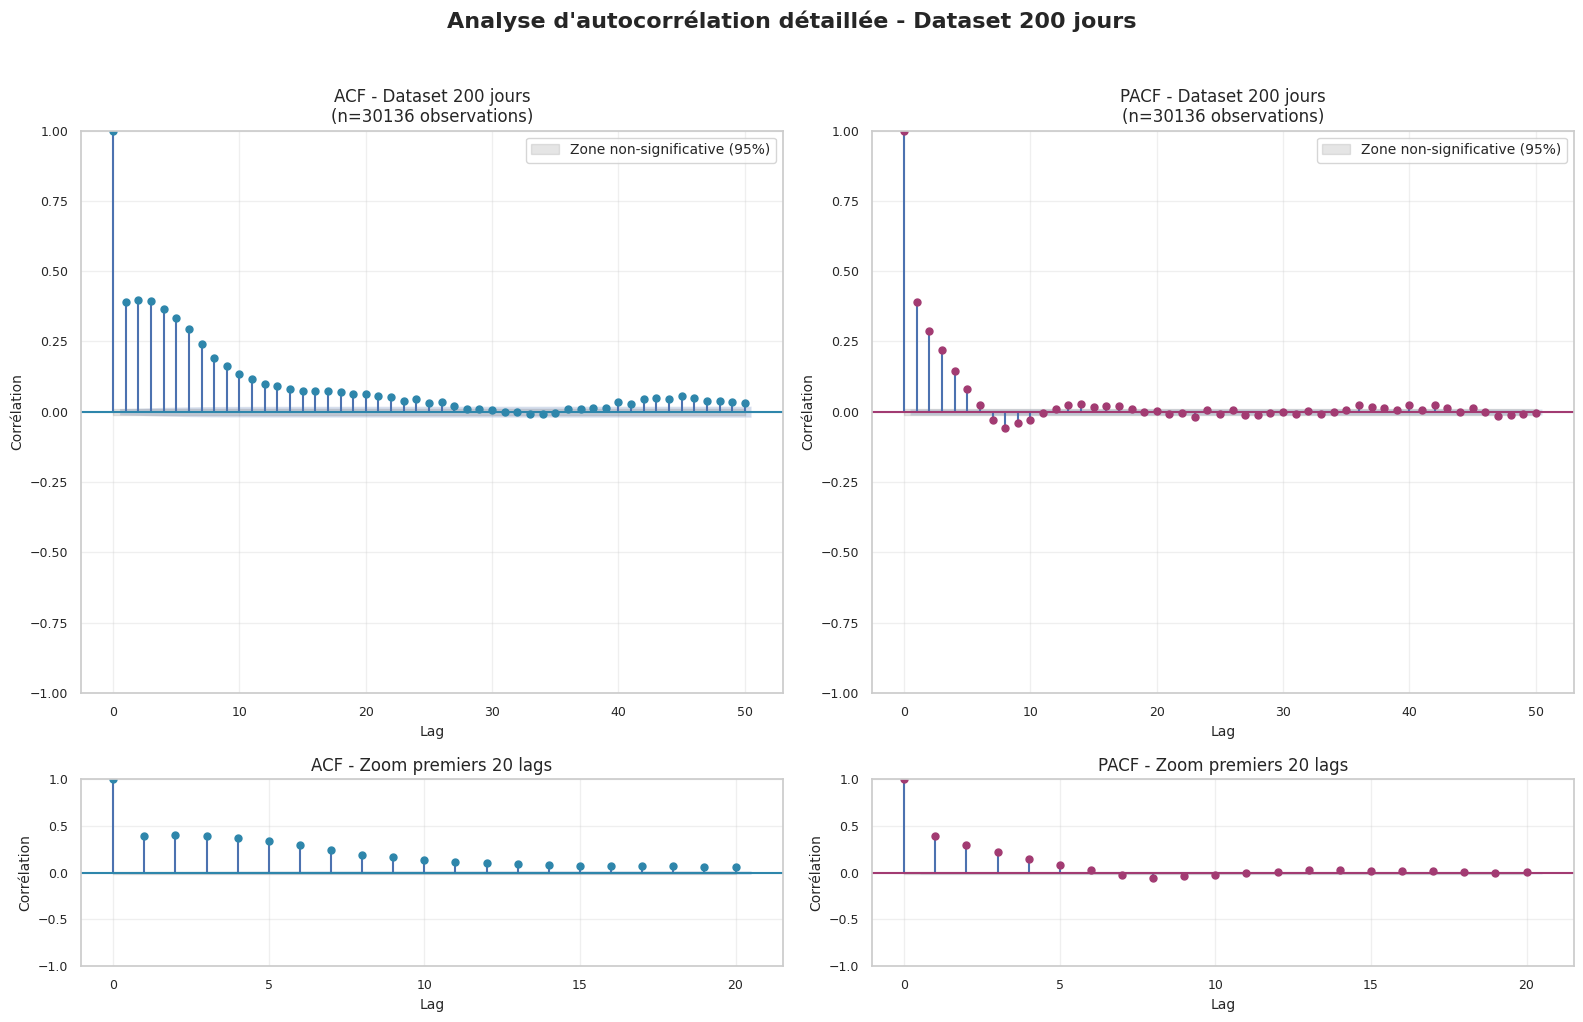

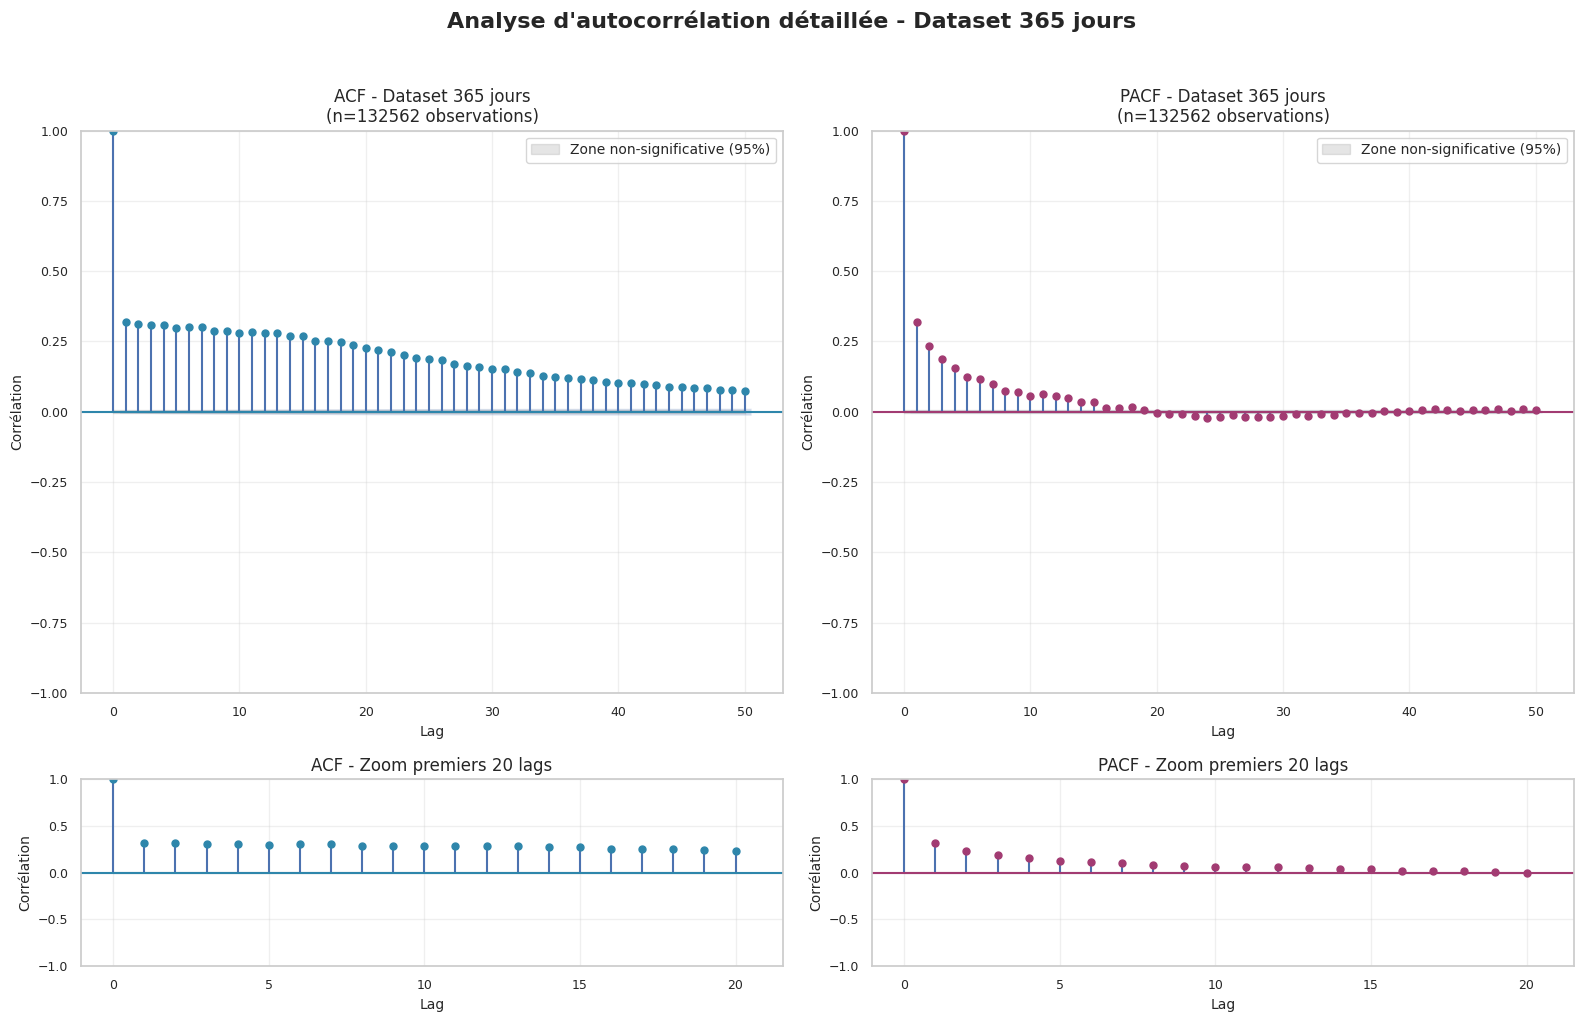

In [58]:
def plot_autocorr_detailed(df, title, lags=50):
    df_sorted = df.sort_values("datetime")
    series = df_sorted["intensity"]
    
    # Calculer des statistiques pour l'affichage
    n = len(series) # n = nombre total de points de données :important dans ACF/PACF pour Calcul l'intervalle de confiance
    conf_int = 1.96 / np.sqrt(n)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10), 
                            gridspec_kw={'height_ratios': [3, 1]})
    
    # ACF (graphique principal)
    plot_acf(series, lags=lags, ax=axes[0, 0], 
            title=f'ACF - {title}\n(n={n} observations)',
            color='#2E86AB')
    axes[0, 0].fill_between(range(lags+1), -conf_int, conf_int, 
                            alpha=0.2, color='gray', label='Zone non-significative (95%)')
    axes[0, 0].legend()
    
    # PACF (graphique principal)
    plot_pacf(series, lags=lags, ax=axes[0, 1], 
            title=f'PACF - {title}\n(n={n} observations)',
            color='#A23B72')
    axes[0, 1].fill_between(range(lags+1), -conf_int, conf_int, 
                            alpha=0.2, color='gray', label='Zone non-significative (95%)')
    axes[0, 1].legend()
    
    # Zoom sur les premiers lags(20) (sous-graphique)
    zoom_lags = min(20, lags)
    
    plot_acf(series, lags=zoom_lags, ax=axes[1, 0],
            title=f'ACF - Zoom premiers {zoom_lags} lags',
            color='#2E86AB')
    axes[1, 0].fill_between(range(zoom_lags+1), -conf_int, conf_int, 
                            alpha=0.2, color='gray')
    
    plot_pacf(series, lags=zoom_lags, ax=axes[1, 1],
            title=f'PACF - Zoom premiers {zoom_lags} lags',
            color='#A23B72')
    axes[1, 1].fill_between(range(zoom_lags+1), -conf_int, conf_int, 
                            alpha=0.2, color='gray')
    
    # Style 
    for ax in axes.flat:
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('Lag', fontsize=10)
        ax.set_ylabel('Corrélation', fontsize=10)
    
    plt.suptitle(f'Analyse d\'autocorrélation détaillée - {title}', 
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Utilisation
plot_autocorr_detailed(df_200, "Dataset 200 jours")
plot_autocorr_detailed(df_365, "Dataset 365 jours")

1. Observations générales :
Pour df_365 (n=132,562 observations) :
Intervalle de confiance très étroit : ±0.0054 (1.96/√132562)

Haute précision statistique grâce au grand échantillon

Pour df_200 (n=30,136 observations) :
Intervalle de confiance plus large : ±0.0113

Moins de précision mais taille d'échantillon suffisante

2. Analyse de l'ACF (AutoCorrelation Function) :
Pattern observé :
Décroissance lente et persistante de l'autocorrélation

Significativité : Beaucoup de lags sont significatifs (dépassent la zone grise)

Périodicité : Pattern répétitif visible (saisonnalité)

Interprétation :
Série NON stationnaire ou avec forte mémoire longue

Présence de saisonnalité (pattern régulier)

Tendance persistante dans les données

3. Analyse de la PACF (Partial AutoCorrelation Function) :
Pattern observé :
Coupure brutale après quelques lags (2-3 lags significatifs)

Premier lag très fortement significatif

Lags suivants rapidement dans la zone non-significative

Interprétation :
Processus de type AR(p) avec p petit (probablement AR(1) ou AR(2))

La dépendance à un temps t dépend surtout des 1-3 observations précédentes

Mémoire courte une fois retirée l'influence des lags intermédiaires

4. Conclusions principales :
a) Nature de la série :
Série avec forte autocorrélation (mémoire longue)

Stationnarité douteuse : L'ACF qui décroît lentement suggère une non-stationnarité

Composante saisonnière présente (visible dans le pattern répétitif)

b) Modélisation suggérée :
Modèle ARIMA(p,d,q) où :

p = 1 ou 2 (basé sur la PACF)

d probablement = 1 (différenciation nécessaire pour stationnariser)

q à déterminer (mais probablement petit)

c) Différence entre df_200 et df_365 :
Patterns similaires : Les deux séries montrent le même comportement

Précision différente : df_365 donne des estimations plus précises

Consistance : Bonne nouvelle - les deux datasets semblent suivre le même processus